# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_study_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
mice_study_complete.head()
# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [33]:
study_results 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [34]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [35]:
# Checking the number of mice
Mice_count = len(mouse_metadata)
print(Mice_count)

249


In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_study_complete['Mouse ID'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Name: Mouse ID, Length: 1893, dtype: bool

In [37]:
dublicated=mice_study_complete.loc[mice_study_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
clean_mice_study=mice_study_complete[~mice_study_complete['Mouse ID'].isin(dublicated)]
len(clean_mice_study['Mouse ID'].unique())

248

In [38]:
# Optional: Get all the data for the duplicate mouse ID. 


In [39]:
mice_study_complete.drop_duplicates(['Mouse ID'])
clean_mice_study = mice_study_complete.drop_duplicates(['Mouse ID'])
clean_mice_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [40]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_mice_study)
print(mice_count)

249


## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_mice_study.head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_mice_study.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_mice_study.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_mice_study.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sem = clean_mice_study.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
std = clean_mice_study.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
summary = pd.DataFrame({
    'Mean Tumor Volume':mean,
    'median Tumor Volume' : median,
    'variance Tumor Volume' : variance,
    'sem Tumor Volume' : sem,
    'std Tumor Volume' : std
})
summary

,Mean Tumor Volume,median Tumor Volume,variance Tumor Volume,sem Tumor Volume,std Tumor Volume
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


In [43]:
summary = clean_mice_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    SEM='sem',
    STD='std'
)
summary

,Mean,Median,Variance,SEM,STD
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


## Bar and Pie Charts

<AxesSubplot:>

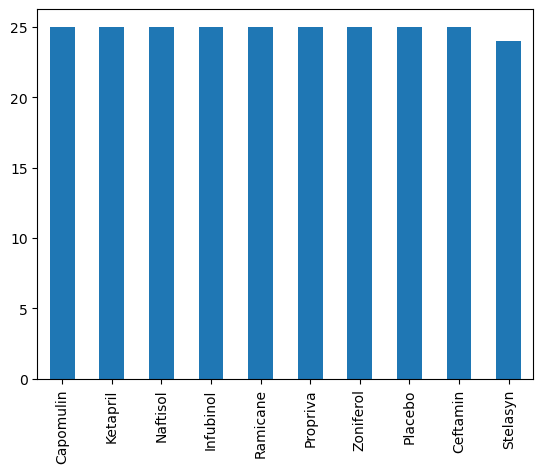

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = clean_mice_study['Drug Regimen'].value_counts()
counts.plot.bar()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

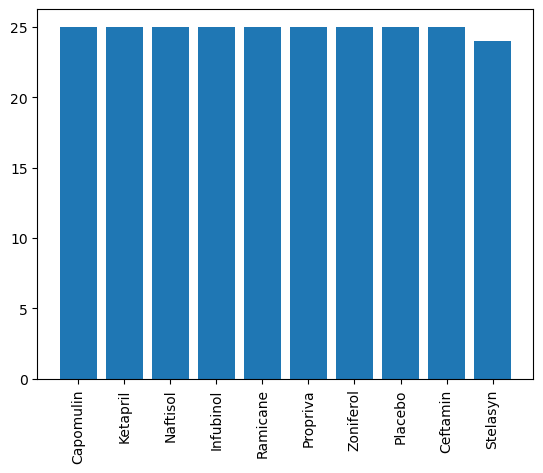

In [45]:
plt.bar(counts.index.values,counts.values)
plt.xticks(rotation=90)

([<matplotlib.patches.Wedge at 0x205f6847370>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')],
 [Text(-0.0037850050782358134, 0.5999880613283548, '50.2%'),
  Text(0.00378500507823574, -0.5999880613283548, '49.8%')])

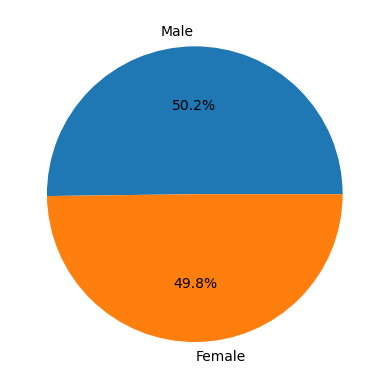

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_mice_study['Sex'].value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')

<AxesSubplot:ylabel='Sex'>

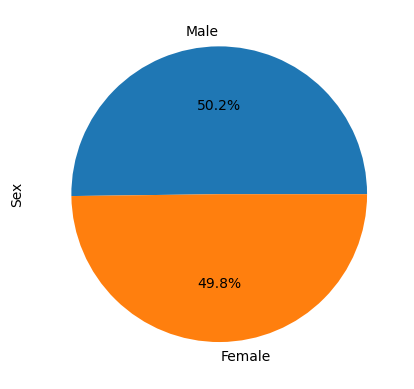

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts.plot.pie(autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoints = clean_mice_study.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


last_tumor_volumes = pd.merge(last_timepoints, clean_mice_study, on=["Mouse ID", "Timepoint"], how="left")[
    ["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]
]
last_tumor_volumes = last_tumor_volumes.loc[
    (last_tumor_volumes["Drug Regimen"] == "Capomulin")
    | (last_tumor_volumes["Drug Regimen"] == "Ramicane")
    | (last_tumor_volumes["Drug Regimen"] == "Infubinol")
    | (last_tumor_volumes["Drug Regimen"] == "Ceftamin")
]
last_tumor_volumes

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,0,Infubinol,45.0
1,a251,0,Infubinol,45.0
3,a275,0,Ceftamin,45.0
6,a411,0,Ramicane,45.0
7,a444,0,Ramicane,45.0
...,...,...,...,...
239,y769,0,Ceftamin,45.0
240,y793,0,Capomulin,45.0
241,y865,0,Ceftamin,45.0
245,z578,0,Ramicane,45.0


In [49]:
# Put treatments into a list for for loop (and later for plot labels)
last_timepoints = clean_mice_study.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Create empty list to fill with tumor vol data (for plotting)
Drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

last_tumor_volumes = pd.merge(last_timepoints, clean_mice_study, on=["Mouse ID", "Timepoint"], how="left")[
    ["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]
]
last_tumor_volumes = last_tumor_volumes.loc[
    (last_tumor_volumes["Drug Regimen"] == "Capomulin")
    | (last_tumor_volumes["Drug Regimen"] == "Ramicane")
    | (last_tumor_volumes["Drug Regimen"] == "Infubinol")
    | (last_tumor_volumes["Drug Regimen"] == "Ceftamin")
]

Drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
vol_data = []

last_tumor_volumes = last_tumor_volumes.loc[
    (last_tumor_volumes["Drug Regimen"] == "Capomulin")
    | (last_tumor_volumes["Drug Regimen"] == "Ramicane")
    | (last_tumor_volumes["Drug Regimen"] == "Infubinol")
    | (last_tumor_volumes["Drug Regimen"] == "Ceftamin")
]
# Calculate the IQR and quantitatively determine if there are any potential outliers.


quartiles = last_tumor_volumes["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
outliers = last_tumor_volumes.loc[(last_tumor_volumes["Tumor Volume (mm3)"] < lower_bound) | (last_tumor_volumes["Tumor Volume (mm3)"] > upper_bound)]
outliers

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)


<AxesSubplot:title={'center':'Final Tumor Volume by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Tumor Volume (mm3)'>

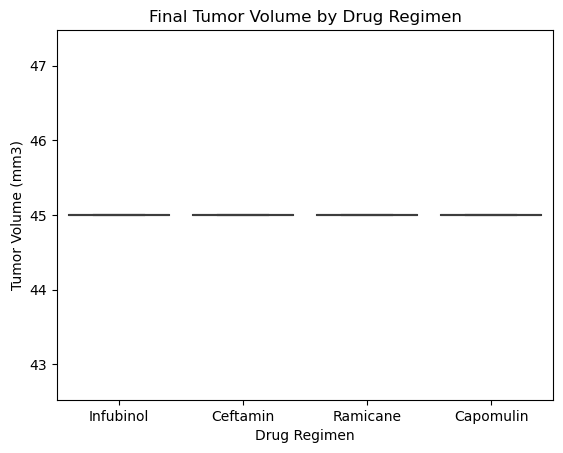

In [55]:

df = pd.DataFrame({'Drug Regimen': last_tumor_volumes['Drug Regimen'], 'Tumor Volume (mm3)': last_tumor_volumes['Tumor Volume (mm3)']})


fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume by Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=df, ax=ax)



## Line and Scatter Plots

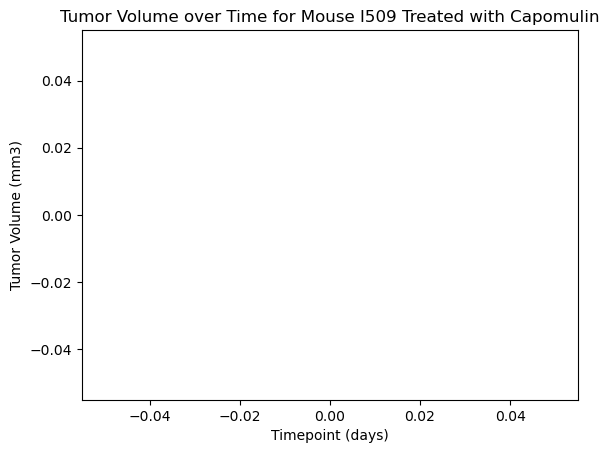

In [51]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_data = clean_mice_study[clean_mice_study['Drug Regimen'] == 'Capomulin']

mouse_id = 'I509'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title(f"Tumor Volume over Time for Mouse {mouse_id} Treated with Capomulin")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

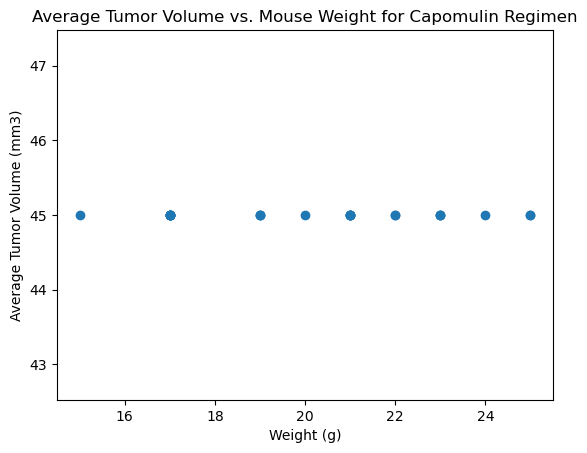

In [52]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean_mice_study.loc[clean_mice_study["Drug Regimen"] == "Capomulin"]

# Group the data by mouse ID and calculate the mean tumor volume and weight for each mouse
capomulin_avg = capomulin.groupby("Mouse ID").mean()[["Weight (g)", "Tumor Volume (mm3)"]]

# Generate the scatter plot
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.show()

In [53]:
mean = clean_mice_study.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

## Correlation and Regression

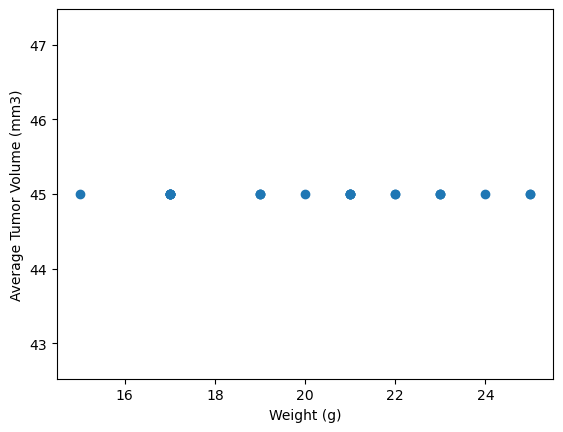

The correlation coefficient between mouse weight and average tumor volume is nan
The slope of the regression line is 0.00
The intercept of the regression line is 45.00
The correlation coefficient of the regression line is 0.00


C:\Users\sherc\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


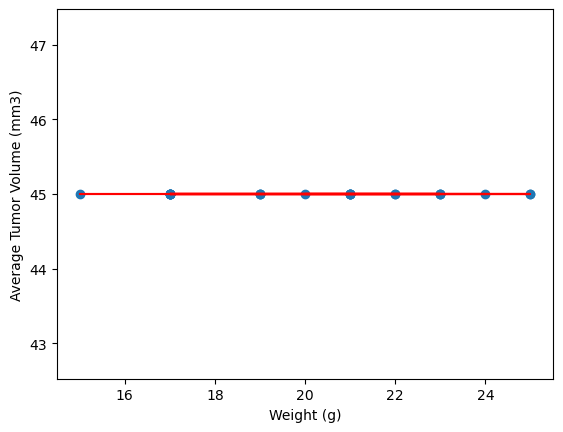

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_data = clean_mice_study.loc[clean_mice_study["Drug Regimen"] == "Capomulin"]
capomulin_grouped = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})
import matplotlib.pyplot as plt

x_values = capomulin_grouped["Weight (g)"]
y_values = capomulin_grouped["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

from scipy.stats import pearsonr

correlation, p_value = pearsonr(x_values, y_values)
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation:.2f}")

from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

print(f"The slope of the regression line is {slope:.2f}")
print(f"The intercept of the regression line is {intercept:.2f}")
print(f"The correlation coefficient of the regression line is {r_value:.2f}")

regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
